# Project Sale of House - Prediction

### Objective

Predict house values in Brazilian cities.

Columns: <br>
Rua -Street <br>
Bairro - Neighborhood <br>
Cidade - Town <br>
Metragem - Footage <br>
Quartos - Bedrooms <br>
Banheiros - Bathrooms <br>
Vagas - Car vacancies <br>
Valor_anuncio - Ad value <br>
Valor_m2 - square meter value <br>
latitude <br>
longitude <br>
Situacao_setor - Industry situation: Urban situation (1, 2 and 3) or rural situation (4, 5, 6, 7 and 8)<br>
V001 - Permanent private domiciles <br>
V002 - Residents of permanent private households <br>
V003 - Average number of residents of permanent private households <br>
V004 - Variance in the number of residents of permanent private households <br>
V005 - Average monthly income of residents <br>
V006 - Variance in the average monthly income of residents <br>
V007 - Average monthly income of residents with investment income <br> 
V008 - Monthly variance of residents with investment income <br>
V009 - Monthly variation of residents over 10 years old with investment income 

In [1]:
# Import Libraries and Databases

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 2 decimal places
pd.set_option("display.precision", 2)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# seaborn default configuration
sns.set()

census_sales_data = pd.read_csv("dados_vendas_censo.csv")

# Columns of interest.
census_sales_data = census_sales_data[['Rua', 'Bairro', 'Cidade', 'Metragem', 'Quartos', 'Banheiros', 'Vagas',
       'Valor_anuncio', 'Valor_m2', 'latitude', 'longitude', 'Situacao_setor', 'V001',
       'V002', 'V003', 'V004', 'V005', 'V006', 'V007', 'V008', 'V009']].dropna() 
census_sales_data

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio,Valor_m2,latitude,...,Situacao_setor,V001,V002,V003,V004,V005,V006,V007,V008,V009
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,7000000.00,7000.00,-23.62,...,1.00,164.00,437.00,2.66,2.04,3158.96,22210644.93,5570.65,25770816.97,2096.19
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,3700000.00,7459.68,-23.64,...,1.00,136.00,425.00,3.13,1.96,7600.44,36778930.17,7890.53,35886906.64,4149.00
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,380000.00,3040.00,-23.75,...,1.00,142.00,493.00,3.47,3.06,805.13,769188.78,1011.75,757433.42,518.77
3,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,540000.00,5400.00,-23.55,...,1.00,156.00,468.00,3.00,1.99,2338.05,7826370.15,2447.89,7925839.76,1543.29
4,Rua Graham Bell,Santo Amaro,São Paulo,440,4,4,6,1980000.00,4500.00,-23.59,...,1.00,107.00,376.00,3.51,2.31,1026.36,272168.67,1143.96,167733.64,735.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5599,Rua Pedro Teixeira,Vila Olímpia,São Paulo,157,3,2,2,960000.00,6114.65,-23.60,...,1.00,177.00,384.00,2.17,1.27,5054.58,33245189.73,5231.93,33485189.78,3649.06
5600,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,1500000.00,5617.98,-23.61,...,1.00,256.00,720.00,2.81,1.60,4249.33,24499871.44,5180.14,25047413.33,2618.76
5601,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,665000.00,7000.00,-23.66,...,1.00,150.00,448.00,2.99,1.81,2425.09,6878872.25,2543.80,6913867.79,1561.58
5603,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,1050000.00,5121.95,-23.62,...,1.00,400.00,1099.00,2.75,1.50,5650.20,20344622.14,5750.84,20127679.27,3459.68


In [2]:
census_sales_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5308 entries, 0 to 5604
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rua             5308 non-null   object 
 1   Bairro          5308 non-null   object 
 2   Cidade          5308 non-null   object 
 3   Metragem        5308 non-null   int64  
 4   Quartos         5308 non-null   int64  
 5   Banheiros       5308 non-null   int64  
 6   Vagas           5308 non-null   int64  
 7   Valor_anuncio   5308 non-null   float64
 8   Valor_m2        5308 non-null   float64
 9   latitude        5308 non-null   float64
 10  longitude       5308 non-null   float64
 11  Situacao_setor  5308 non-null   float64
 12  V001            5308 non-null   float64
 13  V002            5308 non-null   float64
 14  V003            5308 non-null   float64
 15  V004            5308 non-null   float64
 16  V005            5308 non-null   float64
 17  V006            5308 non-null   f

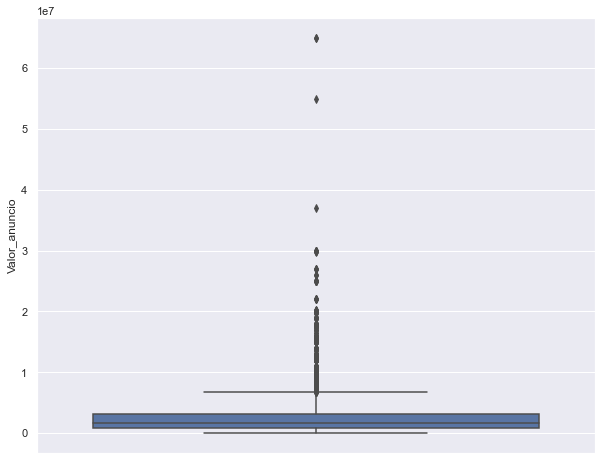

In [3]:
plt.figure(figsize=(10, 8))
ax = sns.boxplot(data = census_sales_data, y="Valor_anuncio") # Ad value boxplot
plt.show()

# Varied distribution due to difference in property prices

In [5]:
# Outliers Ad value > 30000000 or Ad value < 100000
census_sales_data.query("Valor_anuncio > 30000000 | Valor_anuncio < 100000")

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio,Valor_m2,latitude,...,Situacao_setor,V001,V002,V003,V004,V005,V006,V007,V008,V009
54,Rua Inglaterra,Jardim Europa,São Paulo,200,3,3,2,13000.00,65.00,-23.57,...,1.00,115.00,360.00,3.13,2.87,21545.71,1577883376.43,26081.65,1794039881.36,11050.67
89,Rua Inglaterra,Jardim Europa,São Paulo,756,5,4,10,37000000.00,48941.80,-23.57,...,1.00,115.00,360.00,3.13,2.87,21545.71,1577883376.43,26081.65,1794039881.36,11050.67
1032,Praça Nicolau Scarpa,Jardim América,São Paulo,1200,4,4,25,65000000.00,54166.67,-23.57,...,1.00,116.00,414.00,3.57,3.01,13131.61,508165993.72,14507.30,541764826.89,7934.91
3521,Rua Estados Unidos,Jardim América,São Paulo,1816,4,10,20,55000000.00,30286.34,-23.57,...,1.00,116.00,414.00,3.57,3.01,13131.61,508165993.72,14507.30,541764826.89,7934.91
3896,Rua Estados Unidos,Jardim América,São Paulo,1200,4,6,24,65000000.00,54166.67,-23.57,...,1.00,116.00,414.00,3.57,3.01,13131.61,508165993.72,14507.30,541764826.89,7934.91


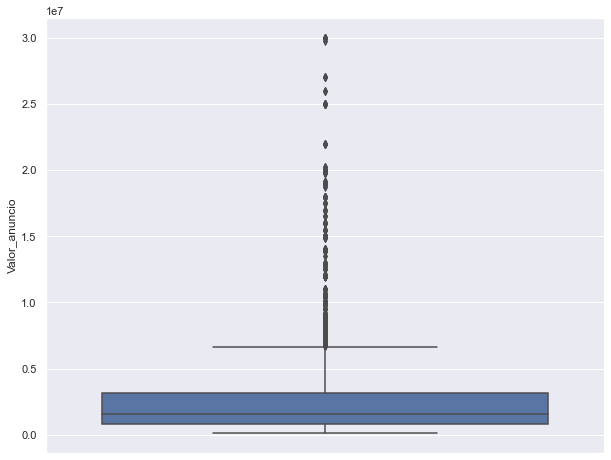

In [6]:
# Remove outliers.
census_sales_data.drop(census_sales_data.query("Valor_anuncio > 30000000 | Valor_anuncio < 100000").index, inplace = True)
plt.figure(figsize=(10, 8))
ax = sns.boxplot(data = census_sales_data, y="Valor_anuncio")
plt.show()

<AxesSubplot:xlabel='Valor_anuncio', ylabel='Valor_m2'>

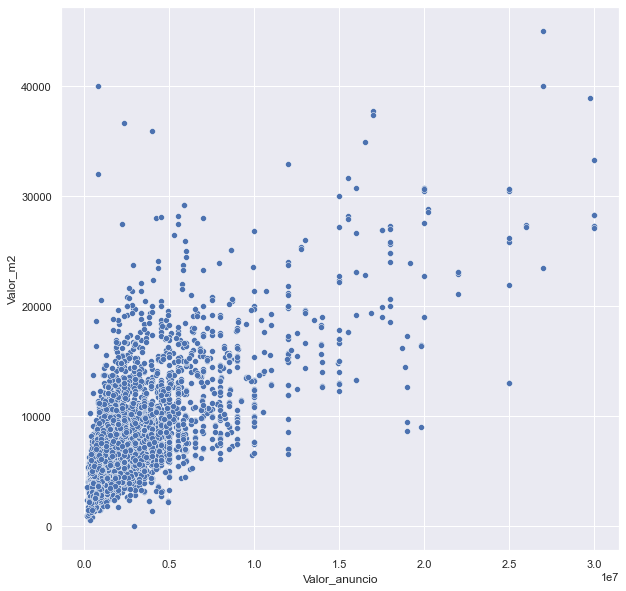

In [8]:
# Ad value X Square meter
plt.figure(figsize=(10, 10))
sns.scatterplot(data = census_sales_data, x="Valor_anuncio", y="Valor_m2")

In [9]:
# Correlation
census_sales_data.corr()

,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio,Valor_m2,latitude,longitude,Situacao_setor,V001,V002,V003,V004,V005,V006,V007,V008,V009
Metragem,1.00,0.23,0.23,0.27,0.30,0.06,-0.09,-0.13,0.48,-0.13,-0.10,0.13,0.05,0.22,0.07,0.23,0.05,0.20
Quartos,0.23,1.00,0.55,0.42,0.37,0.12,-0.01,-0.19,-0.01,-0.18,-0.15,0.16,0.07,0.32,0.12,0.33,0.11,0.31
Banheiros,0.23,0.55,1.00,0.46,0.47,0.22,-0.03,-0.25,-0.03,-0.22,-0.17,0.21,0.07,0.41,0.11,0.41,0.08,0.39
Vagas,0.27,0.42,0.46,1.00,0.48,0.15,-0.04,-0.19,-0.01,-0.21,-0.15,0.24,0.09,0.34,0.11,0.34,0.08,0.32
Valor_anuncio,0.30,0.37,0.47,0.48,1.00,0.70,0.02,-0.21,-0.00,-0.22,-0.19,0.13,0.08,0.45,0.11,0.45,0.07,0.47
Valor_m2,0.06,0.12,0.22,0.15,0.70,1.00,0.05,-0.18,-0.03,-0.11,-0.15,-0.13,0.01,0.29,0.04,0.28,0.02,0.37
latitude,-0.09,-0.01,-0.03,-0.04,0.02,0.05,1.00,0.15,-0.03,-0.00,-0.02,-0.05,0.03,-0.05,-0.09,-0.07,-0.07,-0.04
longitude,-0.13,-0.19,-0.25,-0.19,-0.21,-0.18,0.15,1.00,-0.01,0.31,0.30,-0.05,0.02,-0.36,-0.10,-0.36,-0.07,-0.38
Situacao_setor,0.48,-0.01,-0.03,-0.01,-0.00,-0.03,-0.03,-0.01,1.00,0.02,0.03,0.03,0.00,-0.03,-0.01,-0.03,-0.01,-0.04
V001,-0.13,-0.18,-0.22,-0.21,-0.22,-0.11,-0.00,0.31,0.02,1.00,0.95,-0.22,-0.12,-0.38,-0.10,-0.39,-0.10,-0.36


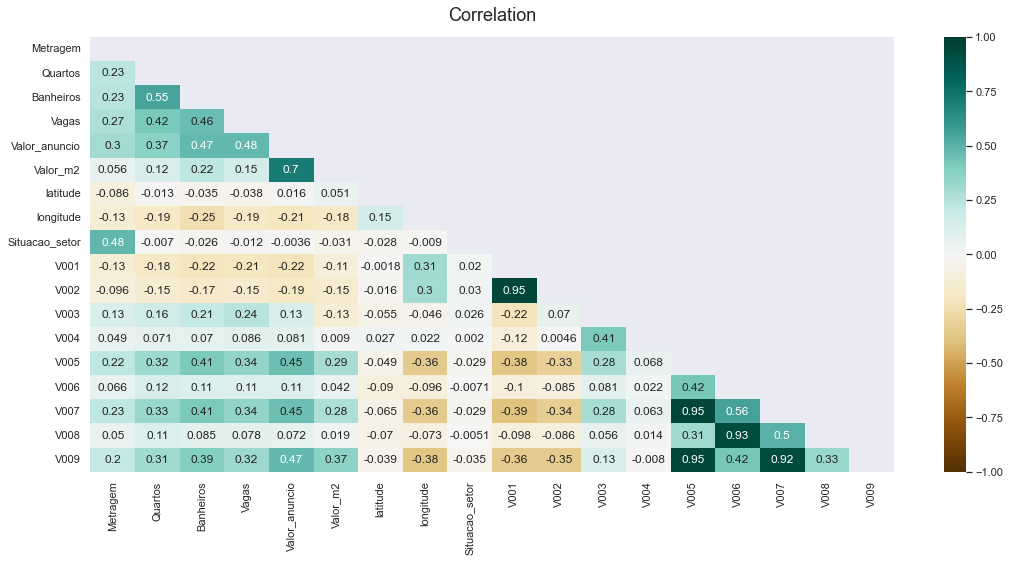

In [10]:
# Correlation

plt.figure(figsize=(18, 8))
#https://www.tylervigen.com/spurious-correlations
mask = np.triu(np.ones_like(census_sales_data.corr(), dtype=bool))
heatmap = sns.heatmap(census_sales_data.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation', fontdict={'fontsize':18}, pad=16);

In [11]:
# Linear Regression. Predict a specific value.

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Split data into training data and test data
# Use footage and ad value. Price according to footage

X = census_sales_data[["Metragem"]] # model feature. column that will predict
Y = census_sales_data["Valor_anuncio"] # value I want to predict

# Returns four sets of data. 25% for testing.
# random_state: Controls the shuffling applied to the data before applying the split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 54)  
lr = LinearRegression()

In [12]:
X_train

,Metragem
3522,105
881,240
769,324
3364,484
4674,103
...,...
3558,397
3994,224
5432,238
4044,300


In [29]:
# Model training
lr.fit(X_train, Y_train)

LinearRegression()

In [31]:
# Returns array with prediction of property values
lr.predict(X_test)

array([9370967.88561768, -171876.21685318, 1147167.78336976, ...,
       2788950.20285357, 1461828.64977916, 3751731.46846679])

In [30]:
# Prediction test
Y_predict_test = lr.predict(X_test)

In [15]:
Y_test

172    4500000.00
4513    345000.00
4865    800000.00
4979   4000000.00
1255   5100000.00
          ...    
5240   1600000.00
4472    580000.00
3291   2200000.00
432    1500000.00
2455   2800000.00
Name: Valor_anuncio, Length: 1326, dtype: float64

In [16]:
# Prediction train
Y_predict_train = lr.predict(X_train)

In [17]:
Y_train

3522    692000.00
881    1490000.00
769    2100000.00
3364   6700000.00
4674    622500.00
          ...    
3558   4280000.00
3994   1500000.00
5432   2300000.00
4044   1600000.00
948    3280000.00
Name: Valor_anuncio, Length: 3977, dtype: float64

In [18]:
# Error. The sum of all errors. 
# The higher the number, the worse. It is further from the predicted values.

from sklearn.metrics import mean_absolute_error, r2_score 


mean_absolute_error(Y_test, Y_predict_test)

1770626.9062636306

In [19]:
mean_absolute_error(Y_train, Y_predict_train)

# The model is not good.
# Perhaps, just one variable is not enough to predict the value of the property.

1825220.303454906

In [21]:
# Try with multiple variables.
#Footage, rooms, bathrooms, vacancies, 

X = census_sales_data[['Metragem', 'Quartos', 'Banheiros', 'Vagas','V001','V007', 'V009']]

Y = census_sales_data["Valor_anuncio"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 54)
lr.fit(X_train, Y_train)

Y_predict_test = lr.predict(X_test)
Y_predict_train = lr.predict(X_train)

# r2 - measuring the amount of variance in the predictions. Compares how much better or worse we are from a simple model.

mae_test = mean_absolute_error(Y_test, Y_predict_test)
r2_test = r2_score(Y_test, Y_predict_test)

mae_train = mean_absolute_error(Y_train, Y_predict_train)
r2_train = r2_score(Y_train, Y_predict_train)

In [22]:
mae_test

1349590.3844325352

In [23]:
r2_test

0.37745069254620955

In [24]:
mae_train

1362945.6915047609

In [25]:
r2_train

0.39899592785823323

In [26]:
mae_test

1349590.3844325352

In [27]:
r2_test

0.37745069254620955

<AxesSubplot:xlabel='Valor_anuncio'>

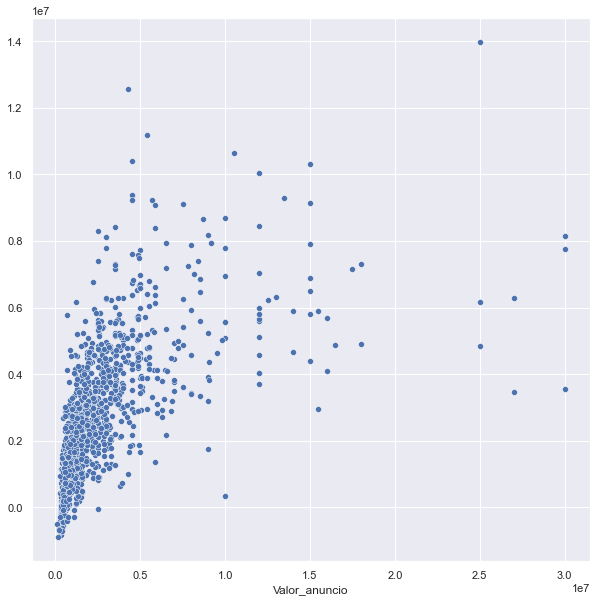

In [28]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x=Y_test, y=Y_predict_test)